In [204]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [205]:
data_train = pd.read_csv("titanic/train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## preprocess

In [206]:
data_train = data_train.replace(["female","male"], [0,1])
data_train = data_train.replace(["S","C","Q"], [0,1,2])
data_train = data_train.fillna(33)
data_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,33,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,33,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,33,0.0
5,6,0,3,"Moran, Mr. James",1,33.0,0,0,330877,8.4583,33,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,33,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,33,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,33,1.0


In [207]:
X_train = np.array(data_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]] )
Y_train = np.array(data_train[["Survived"]])

X_train.shape
Y_train.shape

(891, 1)

## Multi Layer Perceptron

In [208]:
model = tf.keras.models.Sequential([
    Dense(6, activation="sigmoid"),
    Dense(256, activation="relu"),
    Dense(512, activation="relu"),
    Dense(128, activation="relu"),
    Dense(2, activation="softmax")
])

In [209]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [210]:
#train
train_output = model.fit(X_train, Y_train, epochs=200)
model.save("my_titanic.h5")

Epoch 1/200
28/28 [==============================] - 2s 7ms/step - loss: 0.6866 - accuracy: 0.6128
Epoch 2/200
28/28 [==============================] - 0s 7ms/step - loss: 0.6674 - accuracy: 0.6218
Epoch 3/200
28/28 [==============================] - 0s 7ms/step - loss: 0.6611 - accuracy: 0.6308
Epoch 4/200
28/28 [==============================] - 0s 7ms/step - loss: 0.6469 - accuracy: 0.6465
Epoch 5/200
28/28 [==============================] - 0s 7ms/step - loss: 0.6453 - accuracy: 0.6543
Epoch 6/200
28/28 [==============================] - 0s 6ms/step - loss: 0.6554 - accuracy: 0.6386
Epoch 7/200
28/28 [==============================] - 0s 6ms/step - loss: 0.6434 - accuracy: 0.6554
Epoch 8/200
28/28 [==============================] - 0s 4ms/step - loss: 0.6420 - accuracy: 0.6487
Epoch 9/200
28/28 [==============================] - 0s 4ms/step - loss: 0.6349 - accuracy: 0.6577
Epoch 10/200
28/28 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.6207
Epoch 11/

c:\Users\matin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


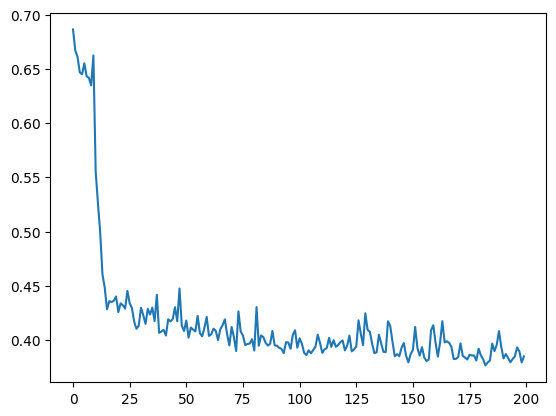

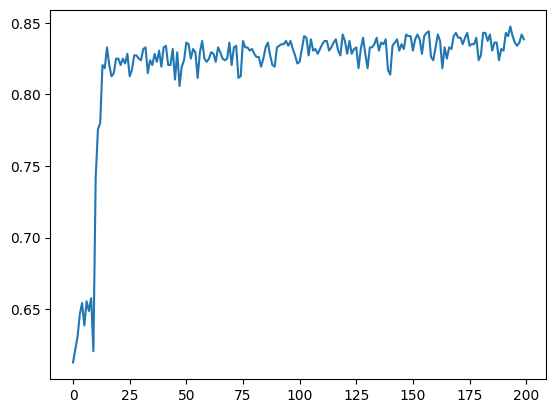

In [211]:
plt.plot(train_output.history['loss'])
plt.show()
plt.plot(train_output.history['accuracy'])
plt.show()

## test data preprocess


In [212]:
data_test = pd.read_csv('titanic/test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [213]:
data_test_survive = pd.read_csv('titanic/gender_submission.csv')
data_test_survive.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [214]:
data_test["Survived"] = data_test_survive[["Survived"]]

In [215]:
data_test = data_test.replace(["female","male"], [0,1])
data_test = data_test.replace(["S","C","Q"], [0,1,2])
data_test = data_test.fillna(33)

In [216]:


X_test = np.array(data_test[["Pclass", "Sex", "Age", "SibSp", "Parch","Embarked"]] )
Y_test = np.array(data_test[["Survived"]])

X_test.shape
Y_test.shape

(418, 1)

In [217]:
model.evaluate(X_test, Y_test)

14/14 [==============================] - 0s 6ms/step - loss: 1.0869 - accuracy: 0.9043


[1.0869050025939941, 0.9043062329292297]

## KNN

In [222]:
neighb = KNeighborsClassifier(n_neighbors=5)
neighb.fit(X_train, Y_train)

c:\Users\matin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [223]:
Y_pred = neighb.predict(X_test)
knn_accuracy = accuracy_score(Y_test, Y_pred)
knn_accuracy

0.7440191387559809

## perceptron(single)

In [224]:
class Perceptron:
    def __init__(self, epochs=200, lr=0.00001):
        # Hyper Parameter
        self.w = np.random.rand(6, 1)
        self.b = np.random.rand(1, 1)
        self.lr = lr
        self.epochs = epochs

    def fit(self, x_train, y_train):
        for epoch in range(self.epochs):
            for i in range(x_train.shape[0]):    
                y_pred = np.matmul(x_train[i], self.w) + self.b
                err = y_train[i] - y_pred
                self.w += (self.lr * x_train[i, :].T * err).T
                self.b += self.lr * err

    def predict(self, x):
        y_pred = np.matmul(x, self.w) + self.b
        return y_pred

    def evaluate(self, X, Y):
        y_pred = np.matmul(X, self.w) + self.b
        y_pred = np.where(y_pred < 0.5, 0, 1)
        return accuracy_score(Y, y_pred)

In [225]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
y_pred = perceptron.predict(X_test)
eval = perceptron.evaluate(X_test, Y_test)
eval

0.65311004784689